# Asset Portfolio Management using Deep Reinforcement Learning
---

## 5.0 Uniform Weights and Maximum Sharpe Strategies
---
We present two allocation strategies which will be used for comparision with the proposed Deep Reinforcement Learning (DRL) methodology.

The two strategies are:

1. Equal Weights Strategy
2. Maximum Sharpe Strategy

### 5.1 Import Relevant Packages

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
from IPython.display import display, HTML
from datetime import datetime
import my_config

In [3]:
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import objective_functions
from pypfopt import EfficientFrontier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 5.2 Load the Train and Test Data for Close Prices

In [5]:
train_close = pd.read_csv('./datasets/train_close.csv')
test_close = pd.read_csv('./datasets/test_close.csv')

In [6]:
train_close

,date,BOREO,ELISA,ICP1V,MEKKO,NDA-FI,NESTE,OLVAS,SAMPO,UPM,YIT
0,2015-01-02,3.058948,14.783914,0.342330,1.356999,4.964346,5.084644,14.965585,21.845457,8.762219,2.927719
1,2015-01-05,3.123178,14.601394,0.316783,1.342329,4.850757,5.059232,15.322756,21.605577,8.596774,2.842549
2,2015-01-07,3.099092,14.940356,0.337221,1.371670,4.781055,5.234566,15.001301,21.354546,8.654044,2.845211
3,2015-01-08,3.099092,14.881692,0.306564,1.408345,4.837850,5.287929,14.965585,21.817562,8.794036,2.992927
4,2015-01-09,3.131206,14.901245,0.306564,1.415680,4.750077,5.163417,15.079877,21.756199,8.787673,2.975627
...,...,...,...,...,...,...,...,...,...,...,...
1954,2022-12-23,37.370842,45.537643,16.860001,8.130344,8.520268,40.848019,28.659306,44.145020,32.289391,2.252282
1955,2022-12-27,37.272232,45.409809,17.360001,8.242746,8.572810,40.661873,28.704586,43.940849,32.280334,2.235639
1956,2022-12-28,36.384800,45.281967,17.059999,8.205278,8.520268,40.326832,28.930962,43.754433,32.171642,2.224544
1957,2022-12-29,36.384800,45.838974,17.280001,8.270846,8.549083,40.764252,29.700638,43.834328,31.836525,2.272622


In [7]:
train_close = train_close.reset_index(drop=True).set_index(['date'])
test_close = test_close.reset_index(drop=True).set_index(['date'])

In [8]:
train_close

,BOREO,ELISA,ICP1V,MEKKO,NDA-FI,NESTE,OLVAS,SAMPO,UPM,YIT
date,,,,,,,,,,
2015-01-02,3.058948,14.783914,0.342330,1.356999,4.964346,5.084644,14.965585,21.845457,8.762219,2.927719
2015-01-05,3.123178,14.601394,0.316783,1.342329,4.850757,5.059232,15.322756,21.605577,8.596774,2.842549
2015-01-07,3.099092,14.940356,0.337221,1.371670,4.781055,5.234566,15.001301,21.354546,8.654044,2.845211
2015-01-08,3.099092,14.881692,0.306564,1.408345,4.837850,5.287929,14.965585,21.817562,8.794036,2.992927
2015-01-09,3.131206,14.901245,0.306564,1.415680,4.750077,5.163417,15.079877,21.756199,8.787673,2.975627
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,37.370842,45.537643,16.860001,8.130344,8.520268,40.848019,28.659306,44.145020,32.289391,2.252282
2022-12-27,37.272232,45.409809,17.360001,8.242746,8.572810,40.661873,28.704586,43.940849,32.280334,2.235639
2022-12-28,36.384800,45.281967,17.059999,8.205278,8.520268,40.326832,28.930962,43.754433,32.171642,2.224544


In [9]:
test_close

,BOREO,ELISA,ICP1V,MEKKO,NDA-FI,NESTE,OLVAS,SAMPO,UPM,YIT
date,,,,,,,,,,
2023-01-03,37.469444,45.747658,17.299999,8.308312,8.686369,41.089996,29.791193,43.488125,31.755007,2.455689
2023-01-04,37.568047,45.126732,17.240000,8.448815,8.854163,40.522274,29.610092,43.994114,31.184397,2.435349
2023-01-05,39.342915,45.628956,17.100000,8.392614,9.013484,41.071381,30.108120,43.257324,31.582916,2.468634
2023-01-09,38.455479,46.514687,18.080000,8.617415,9.091450,41.806625,30.787254,43.568016,31.736897,2.529656
2023-01-10,39.441517,46.788628,18.480000,8.505015,9.072806,41.294743,30.289219,43.301712,31.510462,2.492673
...,...,...,...,...,...,...,...,...,...,...
2024-12-19,10.000000,41.459999,10.090000,11.520000,10.465000,11.455000,28.900000,38.810001,25.709999,2.366000
2024-12-20,10.400000,41.560001,10.250000,11.880000,10.245000,11.225000,28.850000,39.009998,25.660000,2.384000
2024-12-23,10.250000,41.400002,10.200000,12.100000,10.300000,11.155000,29.000000,38.990002,25.719999,2.442000


### 5.3 Uniform Weights Portfolio

In [11]:
def show_clean_p(port_df):
    p1_show_1 = (port_df.transpose()[0]).map(lambda x: "{:.3%}".format(x)).to_frame().transpose()
    return display(HTML(p1_show_1.to_html()))

In [12]:
ticker_list = list(train_close) # Get List of all ticker symbols
n_assets = len(ticker_list) # Number of assets

uniform_weights = np.ones((n_assets))/n_assets

uniform_weights_port = pd.DataFrame([uniform_weights], columns = ticker_list)

print("\nuniform weights portfolio:\n")
show_clean_p(uniform_weights_port)


uniform weights portfolio:



,BOREO,ELISA,ICP1V,MEKKO,NDA-FI,NESTE,OLVAS,SAMPO,UPM,YIT
0,10.000%,10.000%,10.000%,10.000%,10.000%,10.000%,10.000%,10.000%,10.000%,10.000%


In [13]:

returns = train_close.pct_change() # get the assets daily returns
mean_daily_returns = returns.mean().values

uw_returns = np.dot(mean_daily_returns, uniform_weights)

print("uniform weights portfolio average daily return = {:.4%}".format(uw_returns))

uniform weights portfolio average daily return = 0.0951%


In [14]:
def get_annualized_return(prices, weights):
    months = (pd.to_datetime(prices.index[-1]).year - pd.to_datetime(prices.index[0]).year) * 12 + \
             (pd.to_datetime(prices.index[-1]).month - pd.to_datetime(prices.index[0]).month)
    
    total_return = (prices.iloc[-1].dot(weights) / prices.iloc[0].dot(weights)) - 1
    
    annualized_return = ((1 + total_return) ** (12 / months)) - 1
    return annualized_return

def get_portfolio_variance(returns, weights):
    covariance_returns = returns.cov() * 252  # Annualize covariance matrix (assuming 250 trading days)
    return np.dot(weights.T, np.dot(covariance_returns, weights))

uniform_weights = np.ones(train_close.shape[1]) / train_close.shape[1]

uw_annual_return = get_annualized_return(train_close, uniform_weights)

uw_var = get_portfolio_variance(returns, uniform_weights)

print("Uniform weights portfolio annualized return = {:.4f}".format(uw_annual_return))
print("Uniform weights portfolio annualized variance = {:.4f}".format(uw_var))
print("Uniform weights portfolio annualized std = {:.4f}".format(np.sqrt(uw_var)))

Uniform weights portfolio annualized return = 0.1655
Uniform weights portfolio annualized variance = 0.0332
Uniform weights portfolio annualized std = 0.1822


In [15]:

uniform_returns = returns.dot(uniform_weights)

rfr = 0 #Risk free rate

uw_vol = uniform_returns.std() * np.sqrt(252)

uw_sharpe_ratio = ((uw_annual_return  - rfr) / uw_vol)

print("uniform weights portfolio sharpe ratio = {:.2f}".format(uw_sharpe_ratio))

uniform weights portfolio sharpe ratio = 0.91


### 5.4 Maximum Sharpe Portfolio
---
We use PyPortfolioOpt library to get the weights for the Maximum Sharpe Portfolio

In [38]:
mu = expected_returns.mean_historical_return(train_close)
Sigma = risk_models.sample_cov(train_close)
ef = EfficientFrontier(mu,Sigma)

raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
max_sharpe_portfolio = pd.DataFrame(cleaned_weights, index=[0])

print("max sharpe portfolio:")
show_clean_p(max_sharpe_portfolio)

_ = ef.portfolio_performance(verbose=True, risk_free_rate=rfr)

print()

max sharpe portfolio:


,BOREO,ELISA,ICP1V,MEKKO,NDA-FI,NESTE,OLVAS,SAMPO,UPM,YIT
0,17.600%,19.764%,35.241%,7.268%,0.000%,20.127%,0.000%,0.000%,0.000%,0.000%


Expected annual return: 40.7%
Annual volatility: 23.9%
Sharpe Ratio: 1.62



F:\Anaconda\envs\pyfolio_env\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


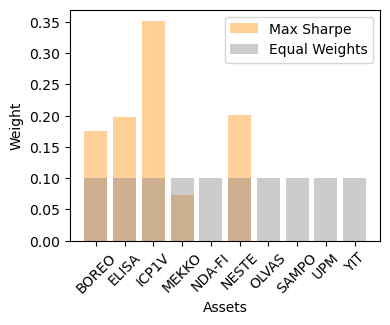

In [40]:
plt.subplots(figsize=(4,3))
plt.bar(max_sharpe_portfolio.T.index, max_sharpe_portfolio.T[0], alpha=0.4, label='Max Sharpe',color='darkorange')
plt.bar(uniform_weights_port.T.index, uniform_weights_port.T[0], alpha=0.4, label='Equal Weights',color='gray')
plt.xlabel('Assets')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('results/equal_sharpe_weights.png', bbox_inches='tight')
plt.show()

In [41]:
train_close.head()

,BOREO,ELISA,ICP1V,MEKKO,NDA-FI,NESTE,OLVAS,SAMPO,UPM,YIT
date,,,,,,,,,,
2015-01-02,3.058948,14.783914,0.342330,1.356999,4.964346,5.084644,14.965585,21.845457,8.762219,2.927719
2015-01-05,3.123178,14.601394,0.316783,1.342329,4.850757,5.059232,15.322756,21.605577,8.596774,2.842549
2015-01-07,3.099092,14.940356,0.337221,1.371670,4.781055,5.234566,15.001301,21.354546,8.654044,2.845211
2015-01-08,3.099092,14.881692,0.306564,1.408345,4.837850,5.287929,14.965585,21.817562,8.794036,2.992927
2015-01-09,3.131206,14.901245,0.306564,1.415680,4.750077,5.163417,15.079877,21.756199,8.787673,2.975627


### 5.5 Store the Data Frames

In [43]:
max_sharpe_portfolio.to_csv('datasets/max_sharpe.csv', index=False)

In [44]:
uniform_weights_port.to_csv('datasets/equal_weights.csv', index=False)